In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


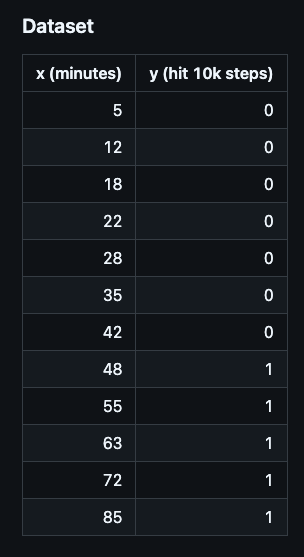


In [2]:
X = np.array([5, 12, 18, 22, 28, 35, 42, 48, 55, 63, 72, 85]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [42]:
### **1️⃣ Train Logistic Regression Model**
#* Fit a logistic regression model using scikit-learn with `solver='liblinear'` on the table above  
#* Print `intercept_` and `coef_`  
print('1)')
model = LogisticRegression(solver='liblinear')
model.fit(X, y)
b0 = model.intercept_[0]
b1 = model.coef_[0][0]
print(f'b0 = ({b0})\nb1 = ({b1})\n')

1)
b0 = (-1.4779204122407046)
b1 = (0.04192002010626462)



In [43]:
### **2️⃣ Print the Confusion Matrix**
#Use the model to predict all given x values, then print the confusion matrix in text form

print('2)')
y_pred=model.predict(X)
cm = confusion_matrix(y, y_pred)
print(cm,'\n')
    


2)
[[6 1]
 [0 5]] 



In [44]:
### **3️⃣ Calculate Accuracy**
#Compute and print the model accuracy (in percent)

print('3)')
def get_accuaracy(cm) -> float:
    cmdiag=0
    cmsum=np.sum(cm)
    for i in range(0,len(cm)): 
        cmdiag+=cm[i][i]
    return cmdiag/cmsum


print(f'{get_accuaracy(cm):.2f}\n')

3)
0.92



In [ ]:

## **4️⃣ Find x for Confidence = 0.70**
#**Decision boundary for 70%**: solve for $x$ such that $p(y=1\mid x) = 0.70$  
#Print the closest x

print('4)')
def get_predict(x):
    return model.predict_proba([[x]])[0][1]
    
def get_bestx():
    confidence=0.7
    difference=None
    best_diff=None
    for i in range(0,150):
        y_pred=get_predict(i)
        if not best_diff or best_diff > abs(confidence - y_pred):
            best_diff = abs(confidence - y_pred)
            best_i = i
            best_prob=y_pred
    return best_i,best_diff,best_prob

print(f'best x is ({get_bestx()[0]})\n'
      f'best difference is ({get_bestx()[1]})\n'
      f'with the probability of ({get_bestx()[2]})')



In [71]:
### **5️⃣ Predict for x = 46**
#Use the trained model to predict if someone with 46 minutes of brisk activity will hit 10k steps
x = 46
prob = get_predict(x)
print(f"Probability: {prob:.2f}")
print(f"Prediction: {'Hit 10k' if prob > 0.5 else 'Not hit 10k'}")

Probability: 0.61
Prediction: Hit 10k


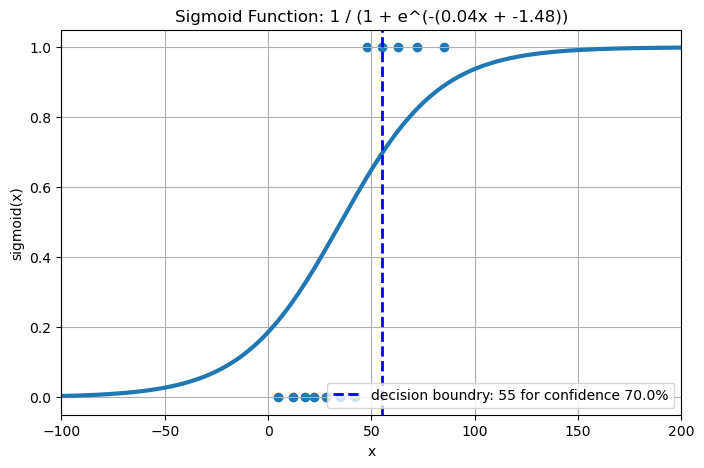

In [83]:
### **6️⃣ Plot the Graph and Decision Boundary**

#Create a plot showing:


#* The data points
#* The logistic regression curve
#* The decision boundary line

x = np.linspace(-400, 600, 500)

# # e = 2.718281828459045

sigmoid =  1 / (1 + np.exp(-(b1 * x + b0)))

plt.figure(figsize=(8, 5))
plt.scatter(X,y)
plt.plot(x, sigmoid, linewidth=3)
plt.title(f"Sigmoid Function: 1 / (1 + e^(-({b1:.2f}x + {b0:.2f}))")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.xlim(-100, 200)
plt.grid(True)
plt.axvline(x=get_bestx()[0], color="blue", linestyle="--", linewidth=2, label=f"decision boundry: {get_bestx()[0]} for confidence {0.7*100}%")
plt.legend()
plt.show()